In [23]:
import torch
from src import *
from matplotlib import pyplot as plt

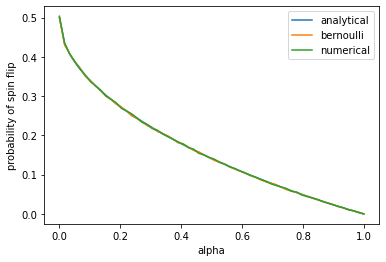

In [48]:
shape=[60,100000]

k=.3

alphas=torch.linspace(0,1,shape[0])
pflip=probablity_flip_gaussian(alphas,k)

plt.plot(alphas,pflip,label='analytical')

bern=bernoulli_noise(torch.zeros(shape).to(torch.bool),alphas,k).to(torch.float)
bern=torch.mean(bern,dim=1)

plt.plot(alphas,bern,label='bernoulli')

thetas=-torch.ones(shape)*.5



thetas=gaussian_noise(thetas,alphas,k)
thetas=qubit_collapse(thetas)
thetas=qubit_to_binary(thetas).float()

thetas=torch.mean(thetas,(1))

plt.plot(alphas,thetas,label='numerical')
plt.ylabel('probability of spin flip')
plt.xlabel('alpha')
plt.legend()
plt.show()

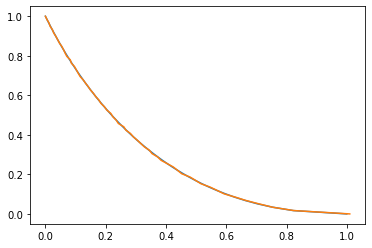

In [49]:
plt.plot(-torch.log2(1-pflip),alphas)
plt.plot(-torch.log2(1-thetas),alphas)

In [6]:
def test_back_to_back():
    x=torch.rand([10, 3, 12, 14])
    y=x.clone()

    y=decimal_to_qubits(y,bits=8)
    y=qubit_to_decimal(y, bits=8)

    #print(x-y)
    return (torch.abs(y-x)<=1/255).all()

In [7]:
test_back_to_back()

tensor(True)

In [54]:
def gaussian_noise(img:torch.Tensor, alpha:torch.Tensor, k:float=1):
    """Takes a batch of images and adds to each one of them a gaussian.
        The gaussian noise can be applied only if the img is in the qubit representation
    Args:
        img (torch.Tensor): images to add noise to
        alpha (torch.Tensor): the sqrt(1-alpha) is the variance of the gaussian noise
        k (float): it is a parameter that changes the way the gaussian noise id added. Defaults to 1. 

    Returns:
        torch.Tensor: The noised images
    """
    assert alpha.shape[0]==img.shape[0], f'alpha must have the same size as the batch size of img, alpha has {alpha.shape[0]} and img has {img.shape[0]}'
    assert img.dtype == torch.float, f'img must be in the qubit representation, img has dtype {img.dtype}'

    mu, sigma = torch.sqrt(alpha), torch.sqrt(1-alpha)*k

    

    noise = torch.rand(img.shape).to(img.device)

    while torch.any(torch.isnan(noise)):
        print('a')
        noise = torch.randn(img.shape).to(img.device)


    #       x*sqrt(alpha)                           +           noise*sqrt(1-alpha)
    return torch.einsum("b, b... -> b...", mu, img) + torch.einsum("b, b... -> b...", sigma, noise)

In [57]:
#TODO fix this
device=torch.device('mps')
images=torch.rand([4,20,20,20]).to(device)
while(True):
    alpha = torch.rand(len(images)).to(device)
    noised_images = gaussian_noise(images, alpha, k)
    if torch.any(torch.isnan(noised_images)):
        raise Exception('nan')

KeyboardInterrupt: 

: 

In [42]:
x=torch.rand([3, 3, 12, 14])
sigma=torch.linspace(0,3.1,3)
sigma=2.
sigma=torch.Tensor([1])
bmult(sigma, torch.normal(0,1, size=x.shape, device=x.device))[1]

tensor([[[ 0.8999,  0.5070, -0.5470,  0.2086, -1.3266,  1.7050, -0.3542,
          -2.4581,  1.5569,  0.2384,  0.6120, -0.9454, -0.2535, -0.6350],
         [ 1.2056,  1.2017,  0.3730,  1.7767,  0.5317, -0.9460,  0.4613,
          -0.4865,  1.5341,  0.7323, -1.5124, -0.8927,  1.0825, -0.5638],
         [-2.7379, -0.7277,  1.5662,  0.0256, -2.1518, -0.8779, -2.1484,
          -0.8310, -0.8032, -0.1597, -0.0256,  0.3978, -1.3606, -0.2172],
         [ 0.0325,  0.4679,  0.4438,  0.4765,  0.7589, -0.2998,  0.1097,
           0.1786, -1.5807, -1.3346, -1.6858,  0.5704,  1.0945,  1.0334],
         [-1.0447, -1.1644, -0.3203,  2.7471,  0.0339,  1.1211, -0.6902,
          -1.2664, -1.7184, -0.6595, -0.0517, -0.0963, -0.2342,  0.8943],
         [ 0.3911, -0.6680,  0.1715,  0.8067, -0.5310, -1.2869, -0.3157,
           0.5325, -0.8237, -0.3000,  0.7396,  0.7102, -1.1577, -0.0318],
         [ 1.6682, -0.2527,  1.4227,  0.3492,  1.0108,  0.0205, -0.6615,
           0.2809,  1.0453, -0.7262, -1.1727,

In [14]:
bernulli_prob.shape

torch.Size([10, 24, 10, 10])

In [2]:
def times2(x:int):
    return x*2

times2(2),times2(.3)

(4, 0.6)

In [3]:
times2.__name__

'times2'